In [1]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 


# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score 
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### 학습목표(데이터 전처리)
- 결측치 처리(missingno) , 이상치 처리(박스플롯)

- 데이터 인코딩(ml 문자열의 값을 입력값으로 허용하지 않는다) -> 숫자형 변환
- 인코딩 방법(레이블 인코딩, 원-핫-인코딩)
- 데이터 인코딩 회귀 X , 트리계열의 알고리즘에 적용할 경우 최적화 된다
- 트리계열의 알고리즘 중에서 성능이 떨어지는 단점이 있을 수 있다. - 숫자의 특성이 반영되기 때문에

- feature scaling -> 정규화, 표준화
- 정규화(0 ~ 1 사이의 값으로 변환 - MinMaxScalar )
- 표준화(정규분포를 따르는 형식으로 평균이 0 이고 분산이 1 가우시안 분포 변환 - StandardScaler)
- 분류는 상관없지만 회귀에서는 target도 스케일링을 해줘야함
- feature important

In [ ]:
iris = load_iris()
print('type - ' , type(iris))
print('keys - ' , iris.keys() , type(iris.keys()))
type(iris.feature_names)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(iris.data,
                                                     iris.target,
                                                     test_size = 0.2,
                                                     random_state = 200) 


In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

In [ ]:
print('불순도(impurity)  - 해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지 - ')
print('엔트로피(entropy) - 불순도를 수치적으로 나타낸 척도')
print('지니(gini)        - 불순도를 수치적으로 나타낸 척도')

gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini' , 'entropy'] , 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2,3],
    'splitter'  : ['random' , 'best']
}



In [ ]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 - ') 
grid_tree = GridSearchCV(gscv_dtc_model     , 
                         param_grid = param ,
                         cv = 5 , 
                         refit = True) 


In [ ]:
grid_tree.fit(X_train, y_train)
grid_tree.cv_results_

In [ ]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

In [ ]:
score_frm[['params' , 'rank_test_score']]

In [ ]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ') 
print(grid_tree.best_score_)

In [ ]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test) 
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

In [ ]:
gscv_dtc_best_model = DecisionTreeClassifier()
gscv_dtc_best_model.fit(X_train, y_train)
y_pred = gscv_dtc_best_model.predict(X_test)
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

In [2]:
import seaborn as sns

In [ ]:
print('feature importance :')
print(estimator.feature_importances_)

In [ ]:
for name, value in zip(iris.feature_names, estimator.feature_importances_):
    print(name, '\t', value)

In [ ]:
sns.barplot(x = estimator.feature_importances_, y = iris.feature_names)

In [ ]:
cancer = load_breast_cancer()
print('type - ' , type(cancer))
print('keys - ' , cancer.keys() , type(cancer.keys()))

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(cancer.data,
                                                     cancer.target,
                                                     test_size = 0.2,
                                                     random_state = 200) 

In [ ]:
cancer_frm = pd.DataFrame(data = cancer.data,
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

In [ ]:
print('GridSearchCV : DecisionTreeClassifier')
print('학습과, 테스트 : 7 : 3')
print('best estimator : ')
print('학습, 예측 :')
print('피처 중요도를 시각화 :')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(cancer.data,
                                                     cancer.target,
                                                     test_size = 0.3,
                                                     random_state = 200) 

In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

In [ ]:
gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini' , 'entropy'] , 
    'max_depth' : [1,2,3,4,5,6] , 
    'min_samples_split' : [2,3],
    'splitter'  : ['random' , 'best']
}

In [ ]:
grid_tree = GridSearchCV(gscv_dtc_model     , 
                         param_grid = param ,
                         cv = 5 , 
                         refit = True) 

In [ ]:
grid_tree.fit(X_train, y_train)
grid_tree.cv_results_

In [ ]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

In [ ]:
score_frm[['params' , 'rank_test_score']]

In [ ]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ') 
print(grid_tree.best_score_)

In [ ]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test) 
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

In [ ]:
gscv_dtc_best_model = DecisionTreeClassifier()
gscv_dtc_best_model.fit(X_train, y_train)
y_pred = gscv_dtc_best_model.predict(X_test)
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

In [ ]:
print('feature importance :')
print(estimator.feature_importances_)
print()
for name, value in zip(cancer.feature_names, estimator.feature_importances_):
    print(name, '\t', value)
sns.barplot(x = estimator.feature_importances_, y = cancer.feature_names)

#### 레이블 인코딩

In [ ]:
label_items = ['집밥', '제육볶음', 'asd쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
labels = encoder.fit(label_items).transform(label_items)
print('labels :', labels)
print('encoding class : ', encoder.classes_)
print('decoding : ', encoder.inverse_transform(labels))

In [ ]:
label_items = ['집밥', '제육볶음', 'asd쥬스', '샐러드', '낫또', '샐러드']
encoder = LabelEncoder()
digit_labels = encoder.fit_transform(label_items)
print('type : ', type(digit_labels))
print('data : ', digit_labels)

print('차원변환 : reshape') # ndarray 를 dataFrame 으로 변환
digit_labels = digit_labels.reshape(-1,1) # -1은 임의적으로 만든다는 뜻
print('shape : ', digit_labels.shape)
print('data : ', digit_labels)
print()

print('One-Hot Encoding : ')
one_hot_encoder = OneHotEncoder()
one_hot_encoder_frm = one_hot_encoder.fit_transform(digit_labels)
print('shape : ', one_hot_encoder_frm.shape)
print('data : ', one_hot_encoder_frm.toarray())

In [ ]:
encoder_frm = pd.DataFrame({
    'label_items' : ['집밥', '제육볶음', 'asd쥬스', '샐러드', '낫또', '샐러드']
})
encoder_frm

pd.get_dummies(encoder_frm)

#### 결측값 처리
- 결측값을 시각화 시켜주는 패키지 인스톨이 필요
- conda install -c conda-forge/label/cf202003 missingno

In [ ]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
tmp_frm = pd.read_csv(csv_data)
tmp_frm

In [ ]:
tmp_frm.isnull().sum()

In [62]:
import missingno as msno

In [ ]:
msno.matrix(tmp_frm)

In [ ]:
msno.bar(tmp_frm)

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
titanic.info()

In [ ]:
titanic.describe()

In [ ]:
msno.matrix(titanic)

In [3]:
from sklearn.impute import SimpleImputer

In [ ]:
tmp_frm

In [ ]:
print('결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 :')
print('fit_transform')
print()
imputer = SimpleImputer(strategy = 'most_frequent')

clean_frm = pd.DataFrame(imputer.fit_transform(tmp_frm),
                         columns = tmp_frm.columns)
clean_frm

In [ ]:
print('titanic age 결측을 mean 대체한다면 :')
imputer = SimpleImputer(strategy = 'mean')

titanic['age'] = imputer.fit_transform(titanic[['age']]) # [[]]를 사용하여 데이터프레임으로 변환

msno.matrix(titanic)

In [ ]:
print('titanic deck 결측을 D로 대체한다면 :')
imputer = SimpleImputer(strategy = 'D')

titanic['deck'] = titanic['deck'].fillna('D') # 문자라 fillna 사용

msno.matrix(titanic)

# feature scalling

In [ ]:
iris_frm = pd.DataFrame(data = iris.data,
                        columns = iris.feature_names)
iris_frm

In [ ]:
iris_frm.info()

In [ ]:
iris_frm.describe()

In [ ]:
print('표준화 : StandardScaler')

s_scaler = StandardScaler()
s_iris_frm = s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.DataFrame(data = s_iris_frm,
                          columns = iris.feature_names)
s_iris_frm

In [ ]:
print('정규화 :  MinMaxScaler')

m_scaler = MinMaxScaler()
m_iris_frm = m_scaler.fit_transform(iris_frm)
m_iris_frm = pd.DataFrame(data = m_iris_frm,
                          columns = iris.feature_names)
m_iris_frm

## 스케일링시 주의할 점 !!! (중요)

In [ ]:
print('예제를 통한 문제점 파악!!')
print()
print()
X_train = np.arange(0, 11).reshape(-1,1)
print('X_train : \n', X_train)
print('X_train type : ', type(X_train))
print()
X_test = np.arange(0, 6).reshape(-1,1)
print('X_test : \n', X_test)
print('X_test type : ', type(X_test))

In [ ]:
print('학습데이터의 정규화 :')
train_scaler = MinMaxScaler()
M_train_scaler = train_scaler.fit_transform(X_train)
print()
print('원본 데이터 : ', X_train.reshape(-1))
print('정규화 데이터 : ', M_train_scaler.reshape(-1))

In [ ]:
print('테스트데이터의 정규화 :')
test_scaler = MinMaxScaler()
M_test_scaler = test_scaler.fit_transform(X_test)
print()
print('원본 데이터 : ', X_test.reshape(-1))
print('정규화 데이터 : ', M_test_scaler.reshape(-1))  ## 정규화 기준이 다름

In [ ]:
print('테스트데이터의 정규화 :')
scaler = MinMaxScaler()
scalar.fit(X_train)
M_train_scaler = scaler.transform(X_train)
M_test_scaler = scaler.transform(X_test)
print()
print('원본 데이터 : ', X_test.reshape(-1))
print('정규화 데이터 : ', M_test_scaler.reshape(-1))  ## 정규화 기준이 다름

## 스케일링 [실습]
- 스케일링 전 모델 학습
- 스케일링 후 모델 학습(정규화, 표준화 각각)

### 스케일링 전 모델 학습

In [4]:
sample_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])
sample_frm.columns = ['target', 'x', 'y']
sample_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  178 non-null    int64  
 1   x       178 non-null    float64
 2   y       178 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.3 KB


In [5]:
print('keys - ' , sample_frm.keys() , type(sample_frm.keys()))
sample_frm_data = sample_frm.iloc[:,[1,2]]
sample_frm_target = sample_frm.iloc[:,0]
sample_frm_target

keys -  Index(['target', 'x', 'y'], dtype='object') <class 'pandas.core.indexes.base.Index'>


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: target, Length: 178, dtype: int64

In [6]:
X_train, X_test , y_train, y_test = train_test_split(sample_frm_data,
                                                     sample_frm_target,
                                                     test_size = 0.2,
                                                     random_state = 200) 
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((142, 2), (36, 2), (142,), (36,))

In [9]:
gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini' , 'entropy'] , 
    'max_depth' : [1,2,3,4,5,6,7,8] , 
    'min_samples_split' : [2,3],
    'splitter'  : ['random' , 'best']
}
grid_tree = GridSearchCV(gscv_dtc_model     , 
                         param_grid = param ,
                         cv = 5 , 
                         refit = True) 

In [10]:
grid_tree.fit(X_train, y_train)
score_frm = pd.DataFrame(grid_tree.cv_results_)
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ') 
print(grid_tree.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}

최적의 파라미터의 정확도 - 
0.8450738916256156


In [11]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test) 
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

answer - 
 67     2
44     1
160    3
171    3
164    3
145    3
141    3
94     2
41     1
18     1
77     2
118    2
153    3
169    3
11     1
132    3
47     1
83     2
34     1
36     1
93     2
124    2
107    2
117    2
86     2
10     1
146    3
49     1
53     1
58     1
159    3
149    3
69     2
115    2
136    3
121    2
Name: target, dtype: int64

guess  - 
 [2 1 3 2 3 1 1 2 1 1 3 2 3 3 1 2 2 3 1 2 2 2 2 2 2 1 2 1 1 1 2 3 2 2 3 2]

acc    - 
 0.7222222222222222


In [12]:
# gscv_dtc_best_model = DecisionTreeClassifier()
# gscv_dtc_best_model.fit(X_train, y_train)
# y_pred = gscv_dtc_best_model.predict(X_test)
# print('answer - \n' , y_test)
# print()
# print('guess  - \n' , y_pred)
# print()
# print('acc    - \n' , accuracy_score(y_test , y_pred))

x 	 0.31270516460883946
y 	 0.6872948353911604


<AxesSubplot:>

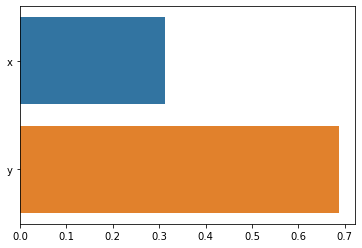

In [13]:
for name, value in zip(['x','y'], estimator.feature_importances_):
    print(name, '\t', value)
sns.barplot(x = estimator.feature_importances_, y = ['x','y'])

### 스케일링 후 모델학습

In [24]:
print('정규화 :  MinMaxScaler')

m_scaler = MinMaxScaler()
m_sample_frm = m_scaler.fit_transform(sample_frm)

정규화 :  MinMaxScaler


In [25]:
type(m_sample_frm)
m_sample_frm

array([[0.        , 0.1916996 , 0.56134094],
       [0.        , 0.2055336 , 0.55064194],
       [0.        , 0.3201581 , 0.64693295],
       [0.        , 0.23913043, 0.85734665],
       [0.        , 0.36561265, 0.32596291],
       [0.        , 0.20158103, 0.83594864],
       [0.        , 0.22332016, 0.72182596],
       [0.        , 0.27865613, 0.7253923 ],
       [0.        , 0.17786561, 0.54707561],
       [0.        , 0.12055336, 0.54707561],
       [0.        , 0.28063241, 0.87874465],
       [0.        , 0.14624506, 0.7146933 ],
       [0.        , 0.19565217, 0.74322397],
       [0.        , 0.19565217, 0.62196862],
       [0.        , 0.22332016, 0.90513552],
       [0.        , 0.21146245, 0.7360913 ],
       [0.        , 0.23320158, 0.7146933 ],
       [0.        , 0.16403162, 0.60770328],
       [0.        , 0.16798419, 1.        ],
       [0.        , 0.46640316, 0.40442225],
       [0.        , 0.17588933, 0.35805991],
       [0.        , 0.60474308, 0.35092725],
       [0.

In [26]:
m_sample_frm = pd.DataFrame(data = m_sample_frm,
                           columns = ['target','x','y'])

In [27]:
m_sample_frm

,target,x,y
0,0.0,0.191700,0.561341
1,0.0,0.205534,0.550642
2,0.0,0.320158,0.646933
3,0.0,0.239130,0.857347
4,0.0,0.365613,0.325963
...,...,...,...
173,1.0,0.970356,0.329529
174,1.0,0.626482,0.336662
175,1.0,0.699605,0.397290
176,1.0,0.365613,0.400856


In [28]:
m_sample_frm_data = m_sample_frm.iloc[:,[1,2]]
m_sample_frm_target = m_sample_frm.iloc[:,0]
print(m_sample_frm_data, '\n', m_sample_frm_target)

            x         y
0    0.191700  0.561341
1    0.205534  0.550642
2    0.320158  0.646933
3    0.239130  0.857347
4    0.365613  0.325963
..        ...       ...
173  0.970356  0.329529
174  0.626482  0.336662
175  0.699605  0.397290
176  0.365613  0.400856
177  0.664032  0.201141

[178 rows x 2 columns] 
 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    1.0
174    1.0
175    1.0
176    1.0
177    1.0
Name: target, Length: 178, dtype: float64


In [29]:
X_train, X_test , y_train, y_test = train_test_split(m_sample_frm_data,
                                                     m_sample_frm_target,
                                                     test_size = 0.2,
                                                     random_state = 200) 

In [ ]:
gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini' , 'entropy'] , 
    'max_depth' : [1,2,3,4,5,6,7,8] , 
    'min_samples_split' : [2,3],
    'splitter'  : ['random' , 'best']
}
grid_tree = GridSearchCV(gscv_dtc_model     , 
                         param_grid = param ,
                         cv = 5 , 
                         refit = True) 

In [40]:
grid_tree.fit(X_train, y_train)
# score_frm = pd.DataFrame(grid_tree.cv_results_)
# print(score_frm())
# print('최적의 파라미터 확인 - ')
# print(grid_tree.best_params_)
# print()
# print('최적의 파라미터의 정확도 - ') 
# print(grid_tree.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

ValueError: Unknown label type: 'continuous'

In [37]:
estimator = grid_tree.best_estimator_
y_pred = estimator.predict(X_test) 
print('answer - \n' , y_test)
print()
print('guess  - \n' , y_pred)
print()
print('acc    - \n' , accuracy_score(y_test , y_pred))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [38]:
grid_tree.fit(X_train, y_train)
score_frm = pd.DataFrame(grid_tree.cv_results_)
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ') 
print(grid_tree.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 191, in fit
    check_classification_targets(y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-package

ValueError: Unknown label type: 'continuous'

In [39]:
estimator = grid_tree.best_estimator_ # 최적 모델로 예측
y_pred = estimator.predict(X_test)

for name, value in zip(['x','y'], estimator.feature_importances_):
    print(name, '\t', value)
sns.barplot(x = estimator.feature_importances_, y = ['x','y'])

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

# 이상치

In [76]:
tips = sns.load_dataset('tips')
print('type :', type(tips))

type : <class 'pandas.core.frame.DataFrame'>


In [77]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

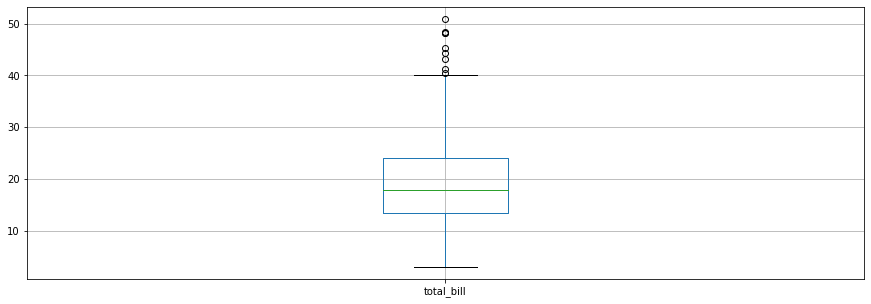

In [47]:
plt.figure(figsize=(15,5))

tips.boxplot(column = ['total_bill'])

plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


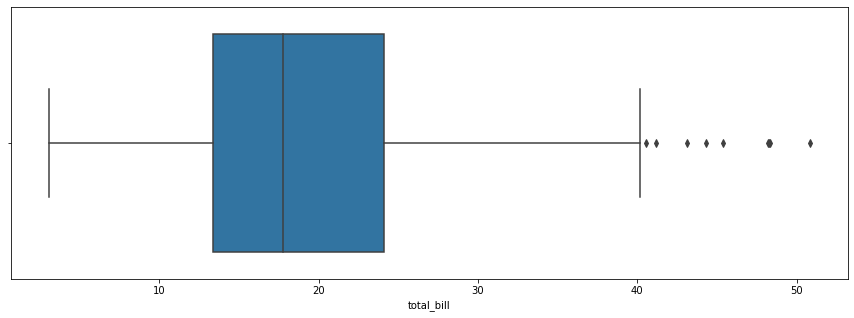

In [48]:
plt.figure(figsize=(15,5))

sns.boxplot(tips['total_bill'])

plt.show()
plt.close()

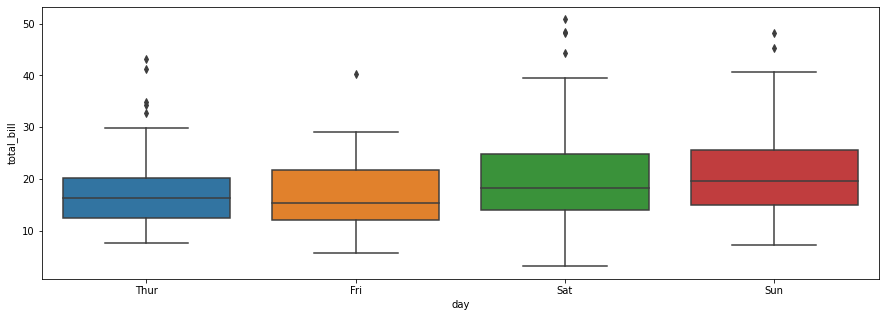

In [49]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            data = tips)
            


plt.show()
plt.close()

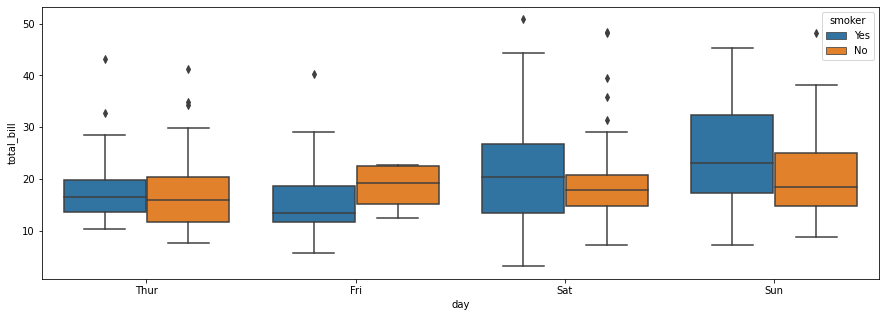

In [52]:
plt.figure(figsize=(15,5))

sns.boxplot(x = 'day',
            y = 'total_bill',
            hue = 'smoker',
            data = tips)
            


plt.show()
plt.close()

In [53]:
print('1. 이상치 값 제거')
print('2. 이상치 값 변환 : -> Nan -> 대체')

1. 이상치 값 제거
2. 이상치 값 변환 : -> Nan -> 대체


In [79]:
q1 = tips['tip'].quantile(0.25)
q3 = tips['tip'].quantile(0.75)  # 1~3범위를 IQR이라 부름

# IQR 공식
iqr = 1.5 * (q3-q1)

In [80]:
def removeQutlier(frm, column) : 
    q1 = frm[column].quantile(0.25)
    q3 = frm[column].quantile(0.75)
    tmp_frm = frm
    # IQR
    iqr = 1.5 * (q3-q1) # ?
    frm[column][(tmp_frm[column]>(q3 + iqr)) | (tmp_frm[column]<(q1 - iqr))] = None
    
    return tmp_frm

In [81]:
removeQutlier(tips, 'tip')

C:\Users\alswo\AppData\Local\Temp/ipykernel_7548/4144008321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frm[column][(tmp_frm[column]>(q3 + iqr)) | (tmp_frm[column]<(q1 - iqr))] = None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,NaN,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [82]:
outlier_frm = removeQutlier(tips, 'total_bill')
plt.show()
plt.close()

C:\Users\alswo\AppData\Local\Temp/ipykernel_7548/4144008321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frm[column][(tmp_frm[column]>(q3 + iqr)) | (tmp_frm[column]<(q1 - iqr))] = None


<AxesSubplot:>

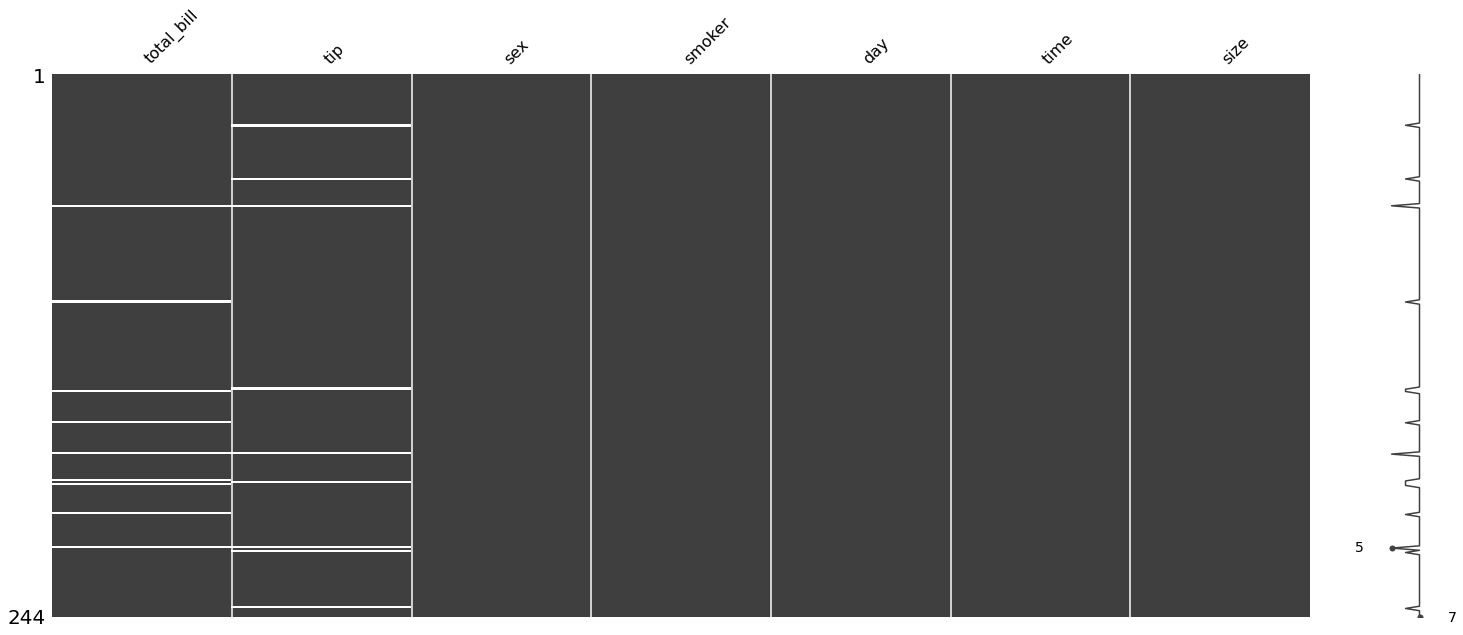

In [83]:
msno.matrix(outlier_frm)